Based heavily on previous Materials Project dataset generation

In [1]:
import periodictable
import requests
import numpy as np
from ase import io, Atoms
from ase.db import connect
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core.structure import Structure
import json
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [2]:
mp_base_url = "https://api.materialsproject.org/"
headers = {
    'accept': 'application/json',
    'X-API-KEY': 'YOUR_API_KEY_HERE',
}

In [3]:
data = np.array(list())
done = False
pg = 0
while not done:
    print(pg)
    query = {
      'e_total_min': 0.0,
      '_limit': 1000,
      '_skip': 1000 * pg,
      '_fields': 'elements,structure,e_total,e_ionic,e_electronic'
    }

    response_pg = requests.get(mp_base_url + "summary", 
                             params = query, headers = headers)
    data_pg = response_pg.json()['data']
    if len(data_pg) == 0:
        done = True
    else:
        data = np.append(data, data_pg)
    pg = pg + 1

0
1
2
3
4
5
6
7
8


In [4]:
len(data)

7290

In [5]:
non_zero_contribs_data = list(filter(lambda d: 10 ** -1 <= d['e_ionic'] <= 10 ** 3 and 10 ** -1 <= d['e_electronic'] <= 10 ** 2.25, data))

In [6]:
len(non_zero_contribs_data) / len(data)

0.9906721536351166

In [7]:
np.min([d['e_electronic'] for d in data])

-64.8373324933333

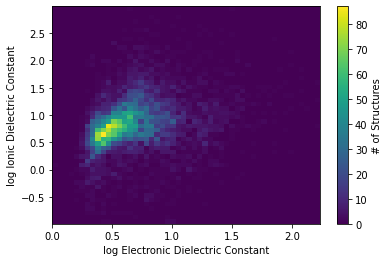

In [8]:
e_ionic = [np.log10(d['e_ionic']) for d in non_zero_contribs_data]
e_electronic = [np.log10(d['e_electronic']) for d in non_zero_contribs_data]
plt.hist2d(e_electronic, e_ionic, bins = 50)
plt.xlabel('log Electronic Dielectric Constant')
plt.ylabel('log Ionic Dielectric Constant');
plt.colorbar().ax.set_ylabel("# of Structures");
plt.savefig('ion_electron_contribs.png')
plt.show()

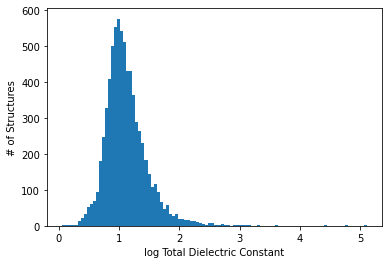

In [9]:
plt.hist([np.log10(d['e_total']) for d in data], bins = 100);
plt.xlabel('log Total Dielectric Constant')
plt.ylabel('# of Structures');
plt.savefig('total_k_hist.png')
plt.show()

In [10]:
counts = np.zeros(118)
for i in range(1, 118):
    for d in data:
        if periodictable.elements[i].symbol in d['elements']:
            counts[i - 1] += 1

In [11]:
el_locs = [
    (1, 1),
    (18, 1),
    (1, 2),
    (2, 2),
    (13, 2),
    (14, 2),
    (15, 2),
    (16, 2),
    (17, 2),
    (18, 2),
    (1, 3),
    (2, 3),
    (13, 3),
    (14, 3),
    (15, 3),
    (16, 3),
    (17, 3),
    (18, 3),
    (1, 4),
    (2, 4),
    (3, 4),
    (4, 4),
    (5, 4),
    (6, 4),
    (7, 4),
    (8, 4),
    (9, 4),
    (10, 4),
    (11, 4),
    (12, 4),
    (13, 4),
    (14, 4),
    (15, 4),
    (16, 4),
    (17, 4),
    (18, 4),
    (1, 5),
    (2, 5),
    (3, 5),
    (4, 5),
    (5, 5),
    (6, 5),
    (7, 5),
    (8, 5),
    (9, 5),
    (10, 5),
    (11, 5),
    (12, 5),
    (13, 5),
    (14, 5),
    (15, 5),
    (16, 5),
    (17, 5),
    (18, 5),
    (1, 6),
    (2, 6),
    (4, 8),
    (5, 8),
    (6, 8),
    (7, 8),
    (8, 8),
    (9, 8),
    (10, 8),
    (11, 8),
    (12, 8),
    (13, 8),
    (14, 8),
    (15, 8),
    (16, 8),
    (17, 8),
    (18, 8),
    (4, 6),
    (5, 6),
    (6, 6),
    (7, 6),
    (8, 6),
    (9, 6),
    (10, 6),
    (11, 6),
    (12, 6),
    (13, 6),
    (14, 6),
    (15, 6),
    (16, 6),
    (17, 6),
    (18, 6),
    (1, 7),
    (2, 7),
    (4, 9),
    (5, 9),
    (6, 9),
    (7, 9),
    (8, 9),
    (9, 9),
    (10, 9),
    (11, 9),
    (12, 9),
    (13, 9),
    (14, 9),
    (15, 9),
    (16, 9),
    (17, 9),
    (18, 9),
    (4, 7),
    (5, 7),
    (6, 7),
    (7, 7),
    (8, 7),
    (9, 7),
    (10, 7),
    (11, 7),
    (12, 7),
    (13, 7),
    (14, 7),
    (15, 7),
    (16, 7),
    (17, 7),
    (18, 7),
]

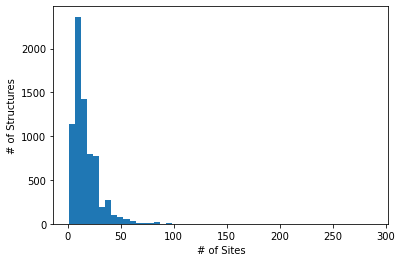

In [12]:
plt.hist([len(d['structure']['sites']) for d in data], bins = 50, log = False);
plt.xlabel('# of Sites')
plt.ylabel('# of Structures')
plt.savefig('sites_hist.png')
plt.show()

/tmp/ipykernel_8716/4120331562.py:10: RuntimeWarning: divide by zero encountered in log10
  nmaxlog = np.max(np.log10(counts))


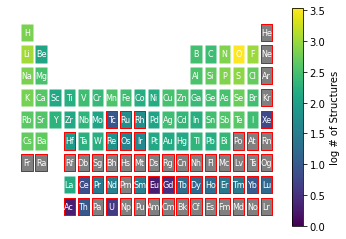

In [13]:
# https://matplotlib.org/stable/gallery/statistics/errorbars_and_boxes.html#sphx-glr-gallery-statistics-errorbars-and-boxes-py
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_labels_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axis-labels-demo-py
# https://stackoverflow.com/questions/9295026/how-to-remove-axis-legends-and-white-padding
# https://towardsdatascience.com/save-plots-matplotlib-1a16b3432d8a
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

size = 0.8
viridis = matplotlib.colormaps['viridis']
nmaxlog = np.max(np.log10(counts))
colors = [viridis(np.log10(counts[i]) / nmaxlog) if counts[i] > 0 else 'grey' for i in range(118)]

# Create figure and axes
fig, ax = plt.subplots(1)

sc = ax.scatter([0.5 + el_locs[i][0] for i in range(118)], 
                [9.5 - el_locs[i][1] for i in range(118)], 
                c=colors)

errorboxes = [Rectangle((el_locs[i][0], 9 - el_locs[i][1]), size, size) for i in range(118)]
pc = PatchCollection(errorboxes, facecolor=colors, edgecolors = ['r' if counts[i] < 100 else 'none' for i in range(118)])
ax.add_collection(pc)

fig.colorbar(matplotlib.cm.ScalarMappable(cmap=viridis, norm=matplotlib.colors.Normalize(vmin=0, vmax=nmaxlog))).ax.set_ylabel("log # of Structures")

for i in range(118):
    ax.annotate(periodictable.elements[i + 1].symbol, xy=(el_locs[i][0] + size / 2, 9 - el_locs[i][1] + size / 2), va="center", ha="center", c = 'w', size = 8)

plt.axis('off')
plt.xlim([0, 19])
plt.ylim([-0.5, 9.5])
plt.savefig('ptable.png')
plt.show()

In [14]:
filtered_data = list(filter(lambda d: not(
    'Tc' in d['elements'] or
    'Ru' in d['elements'] or
    'Rh' in d['elements'] or
    'Xe' in d['elements'] or
    'Hf' in d['elements'] or
    'Re' in d['elements'] or
    'Os' in d['elements'] or
    'Ir' in d['elements'] or
    'Ce' in d['elements'] or
    'Pr' in d['elements'] or
    'Nd' in d['elements'] or
    'Sm' in d['elements'] or
    'Eu' in d['elements'] or
    'Gd' in d['elements'] or
    'Tb' in d['elements'] or
    'Dy' in d['elements'] or
    'Ho' in d['elements'] or
    'Er' in d['elements'] or
    'Tm' in d['elements'] or
    'Yb' in d['elements'] or
    'Lu' in d['elements'] or
    'Ac' in d['elements'] or
    'Th' in d['elements'] or
    'U' in d['elements']), data))

In [15]:
len(filtered_data)

6710

/tmp/ipykernel_8716/2013523353.py:16: RuntimeWarning: divide by zero encountered in log10
  nmaxlog = np.max(np.log10(counts))


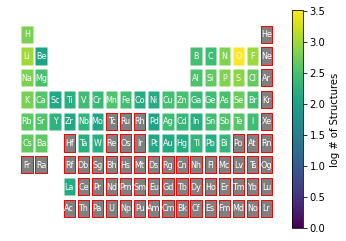

In [16]:
counts = np.zeros(118)
for i in range(1, 118):
    for d in filtered_data:
        if periodictable.elements[i].symbol in d['elements']:
            counts[i - 1] += 1

# https://matplotlib.org/stable/gallery/statistics/errorbars_and_boxes.html#sphx-glr-gallery-statistics-errorbars-and-boxes-py
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_labels_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axis-labels-demo-py
# https://stackoverflow.com/questions/9295026/how-to-remove-axis-legends-and-white-padding
# https://towardsdatascience.com/save-plots-matplotlib-1a16b3432d8a
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

size = 0.8
viridis = matplotlib.colormaps['viridis']
nmaxlog = np.max(np.log10(counts))
colors = [viridis(np.log10(counts[i]) / nmaxlog) if counts[i] > 0 else 'grey' for i in range(118)]

# Create figure and axes
fig, ax = plt.subplots(1)

sc = ax.scatter([0.5 + el_locs[i][0] for i in range(118)], 
                [9.5 - el_locs[i][1] for i in range(118)], 
                c=colors)

errorboxes = [Rectangle((el_locs[i][0], 9 - el_locs[i][1]), size, size) for i in range(118)]
pc = PatchCollection(errorboxes, facecolor=colors, edgecolors = ['r' if counts[i] < 100 else 'none' for i in range(118)])
ax.add_collection(pc)

fig.colorbar(matplotlib.cm.ScalarMappable(cmap=viridis, norm=matplotlib.colors.Normalize(vmin=0, vmax=nmaxlog))).ax.set_ylabel("log # of Structures")

for i in range(118):
    ax.annotate(periodictable.elements[i + 1].symbol, xy=(el_locs[i][0] + size / 2, 9 - el_locs[i][1] + size / 2), va="center", ha="center", c = 'w', size = 8)

plt.axis('off')
plt.xlim([0, 19])
plt.ylim([-0.5, 9.5])
plt.savefig('ptable.png')
plt.show()

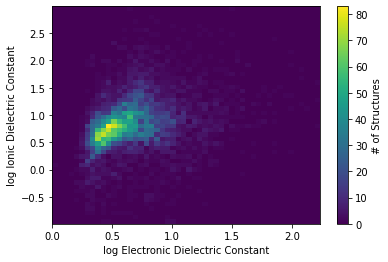

In [19]:
filtered_non_zero_contribs_data = list(filter(lambda d: 10 ** -1 <= d['e_ionic'] <= 10 ** 3 and 10 ** -1 <= d['e_electronic'] <= 10 ** 2.25, 
                                              filtered_data))
e_ionic = [np.log10(d['e_ionic']) for d in filtered_non_zero_contribs_data]
e_electronic = [np.log10(d['e_electronic']) for d in filtered_non_zero_contribs_data]
plt.hist2d(e_electronic, e_ionic, bins = 50)
plt.xlabel('log Electronic Dielectric Constant')
plt.ylabel('log Ionic Dielectric Constant');
plt.colorbar().ax.set_ylabel("# of Structures");
plt.savefig('filtered_ion_electron_contribs.png')
plt.show()

In [21]:
len(filtered_non_zero_contribs_data) / len(filtered_data)

0.990909090909091

In [18]:
data_indices = np.random.permutation(np.arange(len(filtered_data)))
train_indices = data_indices[:int(np.floor(0.8 * len(filtered_data)))]
val_indices = data_indices[int(np.floor(0.8 * len(filtered_data))):int(np.floor(0.9 * len(filtered_data)))]
test_indices = data_indices[int(np.floor(0.9 * len(filtered_data))):]

In [22]:
# Adapted from Dr. Fung's code
data_list=[]
adaptor = AseAtomsAdaptor()
for i in train_indices:
    ase_crystal = adaptor.get_atoms(
        Structure.from_dict(filtered_data[i]['structure']))
    positions = ase_crystal.get_positions().tolist()
    cell = ase_crystal.get_cell().tolist()
    atomic_numbers = ase_crystal.get_atomic_numbers().tolist()

    data_dict = {
        'structure_id': str(i),
        'positions': positions,
        'cell': cell,
        'atomic_numbers': atomic_numbers,
        'y': [np.log10(filtered_data[i]['e_total'])],
    }
    data_list.append(data_dict)

with open('./train_data.json', 'w') as f:
    json.dump(data_list , f)

In [23]:
# Adapted from Dr. Fung's code
data_list=[]
adaptor = AseAtomsAdaptor()
for i in val_indices:
    ase_crystal = adaptor.get_atoms(
        Structure.from_dict(filtered_data[i]['structure']))
    positions = ase_crystal.get_positions().tolist()
    cell = ase_crystal.get_cell().tolist()
    atomic_numbers = ase_crystal.get_atomic_numbers().tolist()

    data_dict = {
        'structure_id': str(i),
        'positions': positions,
        'cell': cell,
        'atomic_numbers': atomic_numbers,
        'y': [np.log10(filtered_data[i]['e_total'])],
    }
    data_list.append(data_dict)

with open('./val_data.json', 'w') as f:
    json.dump(data_list , f)

In [24]:
# Adapted from Dr. Fung's code
data_list=[]
adaptor = AseAtomsAdaptor()
for i in test_indices:
    ase_crystal = adaptor.get_atoms(
        Structure.from_dict(filtered_data[i]['structure']))
    positions = ase_crystal.get_positions().tolist()
    cell = ase_crystal.get_cell().tolist()
    atomic_numbers = ase_crystal.get_atomic_numbers().tolist()

    data_dict = {
        'structure_id': str(i),
        'positions': positions,
        'cell': cell,
        'atomic_numbers': atomic_numbers,
        'y': [np.log10(filtered_data[i]['e_total'])],
    }
    data_list.append(data_dict)

with open('./test_data.json', 'w') as f:
    json.dump(data_list , f)